<a href="https://colab.research.google.com/github/neygenius/python/blob/lab5-var5/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Лабораторная № 5. Обучение и тестирование модели**


---


1.   Разделить набор данных на сбалансированные выборки,
2.   При помощи PyTorch реализовать модель нейронной сети,
3.   Обучить модель и оценить качество обучения.




In [1]:
import torch
import torch.nn as nn
import torch
import torch.optim as optim
import torch.nn.functional as F
from torchvision import datasets, models, transforms
from torch.utils.data import DataLoader, Dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import glob
from PIL import Image
from sklearn.model_selection import train_test_split
import random

c:\Users\mrney\AppData\Local\Programs\Python\Python39\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [11]:
images_list = []
images_list = glob.glob(os.path.join("C:/Users/mrney/Desktop/py/dataset/brown bear","*.jpg"))
images_list2 = glob.glob(os.path.join("C:/Users/mrney/Desktop/py/dataset/polar bear","*.jpg"))

labels = []
for i in range(len(images_list)):
    labels.append(True)
for i in range(len(images_list2)):
    labels.append(False)

for i in images_list2:
    images_list.append(i)

train_list, train_test_val, train_val, test_val = train_test_split(images_list, labels, test_size=0.2, shuffle=True)
test_list, val_list, test, val = train_test_split(train_test_val, test_val, test_size=0.5)

In [20]:
print(len(images_list),"\t",len(images_list)/len(images_list)*100,"%")
print(images_list[:5])
print(len(train_list),"\t",len(train_list)/len(images_list)*100,"%")
print(train_list[:5])
print(len(test_list),"\t",len(test_list)/len(images_list)*100,"%")
print(test_list[:5])
print(len(val_list),"\t",len(val_list)/len(images_list)*100,"%")
print(val_list[:5])

2000 	 100.0 %
['C:/Users/mrney/Desktop/py/dataset/brown bear\\0000.jpg', 'C:/Users/mrney/Desktop/py/dataset/brown bear\\0001.jpg', 'C:/Users/mrney/Desktop/py/dataset/brown bear\\0002.jpg', 'C:/Users/mrney/Desktop/py/dataset/brown bear\\0003.jpg', 'C:/Users/mrney/Desktop/py/dataset/brown bear\\0004.jpg']
1600 	 80.0 %
['C:/Users/mrney/Desktop/py/dataset/polar bear\\0116.jpg', 'C:/Users/mrney/Desktop/py/dataset/polar bear\\0187.jpg', 'C:/Users/mrney/Desktop/py/dataset/polar bear\\0328.jpg', 'C:/Users/mrney/Desktop/py/dataset/brown bear\\0129.jpg', 'C:/Users/mrney/Desktop/py/dataset/brown bear\\0534.jpg']
200 	 10.0 %
['C:/Users/mrney/Desktop/py/dataset/polar bear\\0222.jpg', 'C:/Users/mrney/Desktop/py/dataset/polar bear\\0507.jpg', 'C:/Users/mrney/Desktop/py/dataset/polar bear\\0643.jpg', 'C:/Users/mrney/Desktop/py/dataset/polar bear\\0711.jpg', 'C:/Users/mrney/Desktop/py/dataset/polar bear\\0164.jpg']
200 	 10.0 %
['C:/Users/mrney/Desktop/py/dataset/polar bear\\0673.jpg', 'C:/Users/mrn

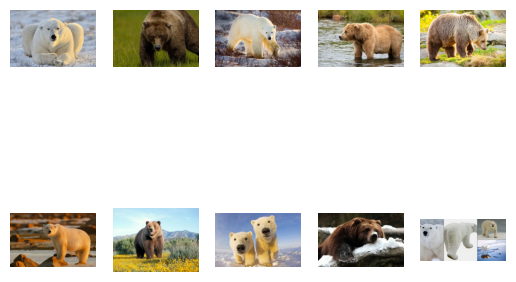

In [22]:
random_idx = np.random.randint(1,len(images_list),size=10)
fig = plt.figure()
i=1
for idx in random_idx:
    ax = fig.add_subplot(2,5,i)
    img = Image.open(images_list[idx])
    plt.imshow(img)
    i+=1
    plt.axis('off')
plt.show()

In [55]:
class ADataset(torch.utils.data.Dataset):

    def __init__(self, file_list, transform=None):
        self.file_list = file_list
        self.transform = transform

    # dataset length
    def __len__(self):
        self.filelength = len(self.file_list)
        return self.filelength

    # load an one of images
    def __getitem__(self, idx):
        img_path = self.file_list[idx]
        # print(img_path)
        img = Image.open(img_path)
        img_transformed = self.transform(img.convert("RGB"))  #

        label = img_path.split("/")[-1].split("\\")[0]
        if label == "polar bear":
            label = 0
        elif label == "brown bear":
            label = 1

        return img_transformed, label

In [56]:
func_transforms =  transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor()
    ])
  
train_data = ADataset(train_list, transform=func_transforms)
test_data = ADataset(test_list, transform=func_transforms)
val_data = ADataset(val_list, transform=func_transforms)

In [57]:
print(train_data[1])
print(val_data[0][1])

(tensor([[[0.2549, 0.2549, 0.2549,  ..., 0.2275, 0.2275, 0.2235],
         [0.2549, 0.2549, 0.2549,  ..., 0.2314, 0.2314, 0.2275],
         [0.2588, 0.2588, 0.2588,  ..., 0.2314, 0.2314, 0.2275],
         ...,
         [0.8314, 0.8314, 0.8314,  ..., 0.7373, 0.7373, 0.7333],
         [0.8314, 0.8314, 0.8314,  ..., 0.7333, 0.7333, 0.7294],
         [0.8275, 0.8275, 0.8275,  ..., 0.7333, 0.7333, 0.7294]],

        [[0.5529, 0.5529, 0.5529,  ..., 0.4471, 0.4471, 0.4431],
         [0.5529, 0.5529, 0.5529,  ..., 0.4510, 0.4510, 0.4471],
         [0.5569, 0.5569, 0.5569,  ..., 0.4510, 0.4510, 0.4471],
         ...,
         [0.9020, 0.9020, 0.9020,  ..., 0.8392, 0.8392, 0.8353],
         [0.9020, 0.9020, 0.9020,  ..., 0.8353, 0.8353, 0.8314],
         [0.9020, 0.9020, 0.9020,  ..., 0.8353, 0.8353, 0.8314]],

        [[0.7490, 0.7490, 0.7490,  ..., 0.6314, 0.6314, 0.6314],
         [0.7490, 0.7490, 0.7490,  ..., 0.6353, 0.6353, 0.6353],
         [0.7529, 0.7529, 0.7529,  ..., 0.6392, 0.6392, 0

In [58]:
lr = 0.001 # learning_rate
batch_size = 100 # we will use mini-batch method

In [59]:
train_loader = DataLoader(dataset = train_data, batch_size=batch_size, shuffle=True )
val_loader = DataLoader(dataset = val_data, batch_size=batch_size, shuffle=True )
test_loader = DataLoader(dataset = test_data, batch_size=batch_size, shuffle=True )

In [60]:
print(len(train_data), len(train_loader))
print(len(val_data), len(val_loader))
train_data[0][0].shape

1600 16
200 2


torch.Size([3, 224, 224])

In [63]:
class Cnn(nn.Module):

    def __init__(self):
        super(Cnn,self).__init__()
        
        self.layer1 = nn.Sequential(
            nn.Conv2d(3,16,kernel_size=3, padding=0,stride=2),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        
        self.layer2 = nn.Sequential(
            nn.Conv2d(16,32, kernel_size=3, padding=0, stride=2),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(2)
            )
        
        self.layer3 = nn.Sequential(
            nn.Conv2d(32,64, kernel_size=3, padding=0, stride=2),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        
        self.fc1 = nn.Linear(3*3*64,10)
        self.dropout = nn.Dropout(0.5)
        self.fc2 = nn.Linear(10,2)
        self.relu = nn.ReLU()
        
    def forward(self,x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = self.layer3(out)
        out = torch.nn.Flatten()(out)
        out = self.relu(self.fc1(out))
        out = self.fc2(out)
        return torch.nn.Sigmoid()(out)

In [64]:
device = "cuda" if torch.cuda.is_available() else "cpu"

torch.manual_seed(1234)
if device =="cuda":
    torch.cuda.manual_seed_all(1234)
    
model = Cnn().to(device)

In [65]:
optimizer = optim.Adam(params = model.parameters(),lr=0.001)
criterion = nn.CrossEntropyLoss()

In [69]:
accuracy_values = []
loss_values = []
val_accuracy_values = []
val_loss_values = []
model.train()
def train_loop(train_loader, val_loader):
    epochs = 10
    for epoch in range(epochs):
        epoch_loss = 0
        epoch_accuracy = 0
        
        for data, label in train_loader:
            data = data.to(device)
            label = label.to(device)
            
            output = model(data)
            loss = criterion(output, label)
            
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
            acc = ((output.argmax(dim=1) == label).float().mean())
            epoch_accuracy += acc/len(train_loader)
            epoch_loss += loss/len(train_loader)  
        print("Epoch : {}, train accuracy : {}, train loss : {}".format(epoch+1, epoch_accuracy,epoch_loss))
        accuracy_values.append(float(epoch_accuracy))
        loss_values.append(float(epoch_loss))
        model.eval()
        with torch.no_grad():
            
            epoch_val_accuracy = 0
            epoch_val_loss = 0
            for data, label in val_loader:
                data = data.to(device)
                label = label.to(device)
                
                val_output = model(data)
                val_loss = criterion(val_output,label)
                
                acc = ((val_output.argmax(dim=1) == label).float().mean())
                epoch_val_accuracy += acc/ len(val_loader)
                epoch_val_loss += val_loss/ len(val_loader)
                
            val_accuracy_values.append(float(epoch_val_accuracy))
            val_loss_values.append(float(epoch_val_loss))
            print("Epoch : {}, val_accuracy : {}, val_loss : {}".format(epoch+1, epoch_val_accuracy,epoch_val_loss))
            print()

In [81]:
train_loop(train_loader, val_loader)

Epoch : 1, train accuracy : 0.9381250739097595, train loss : 0.3736405372619629
Epoch : 1, val_accuracy : 0.9550000429153442, val_loss : 0.35778355598449707

Epoch : 2, train accuracy : 0.9362499713897705, train loss : 0.3761889934539795
Epoch : 2, val_accuracy : 0.9550000429153442, val_loss : 0.3562451899051666

Epoch : 3, train accuracy : 0.9412499666213989, train loss : 0.37189096212387085
Epoch : 3, val_accuracy : 0.9399999976158142, val_loss : 0.37342146039009094



In [76]:
def accuracy(train, val):
    plt.figure(figsize=(15, 5))
    plt.plot(range(len(train)), train, color="green")
    plt.plot(range(len(val)), val, color="red")
    plt.legend(["Train accuracy", "Valid accuracy"])
    plt.show()

In [77]:
def loss(train, val):
    plt.figure(figsize=(15, 5))
    plt.plot(range(len(train)), [float(value) for value in train], color="blue")
    plt.plot(range(len(val)), [float(value) for value in val], color="orange")
    plt.legend(["Train loss", "Valid loss"])
    plt.show()

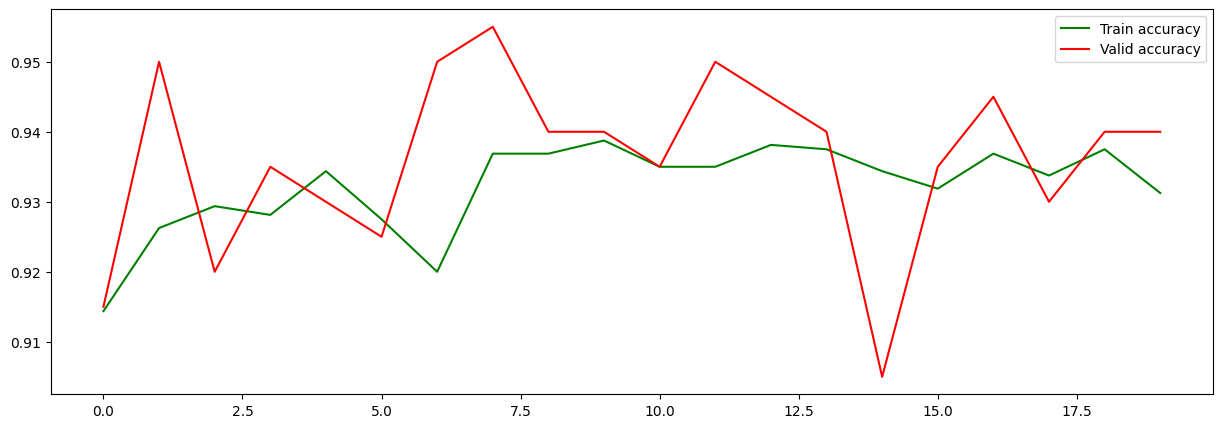

In [78]:
accuracy(accuracy_values, val_accuracy_values)

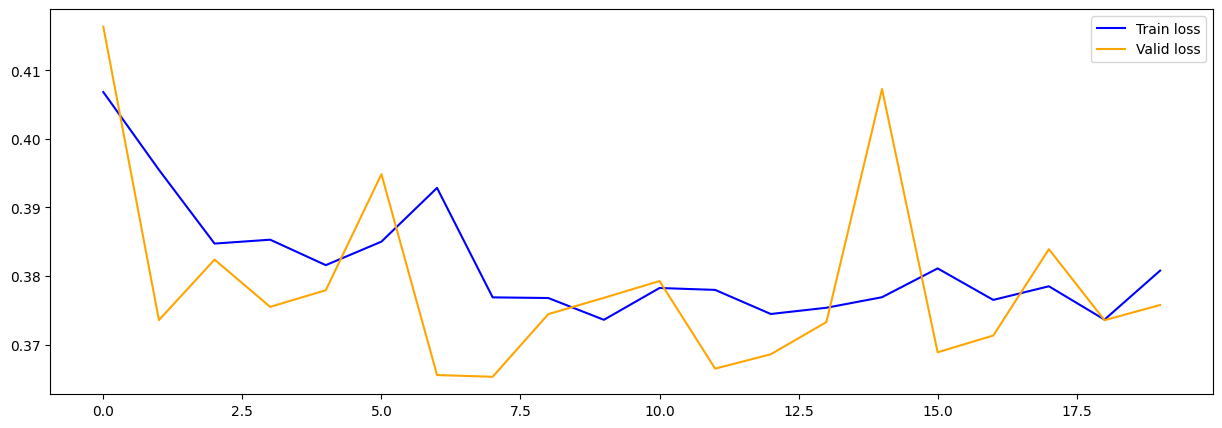

In [79]:
loss(loss_values, val_loss_values)